<a href="https://colab.research.google.com/github/vochicong/ai-memo/blob/master/learn_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 線形関数を学習

学習対象は、Celsius から Fahrenheit へ変換する関数

$$ f = c \times 1.8 + 32 $$

まず TensorFlow/Keras でやります。
そのうちに、Chainer や PyTorch でのやり方と比較したいです。

Dense weights: [array([[1.8458339]], dtype=float32), array([31.118113], dtype=float32)]


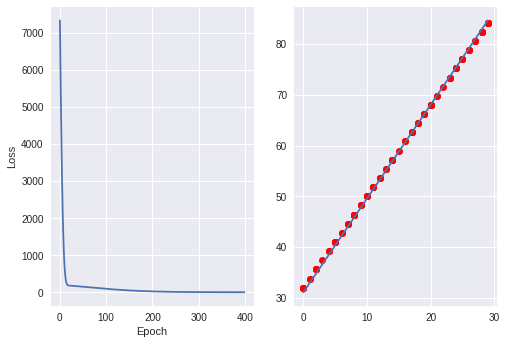

In [5]:
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import numpy as np

def celsius_to_fahrenheith(c):
    f = 1.8 * c + 32
    return f

def gen_data(n_samples=10, max_input_value=100):
    inputs = np.random.randint(n_samples, size=max_input_value)
    inputs.sort()
    outputs = list(map(celsius_to_fahrenheith, inputs))
    return inputs, outputs

class MyTensorFlow:
    def __init__(self, inputs, outputs):
        self.inputs = inputs
        self.outputs = outputs
        
    def model_fit(self, epochs=300):
        dense = keras.layers.Dense(units=1, input_shape=[1])
        self.model = keras.Sequential([dense])
        self.model.compile(loss=keras.losses.mean_squared_error, 
                      optimizer=keras.optimizers.Adam(.1))
        self.history = self.model.fit(self.inputs, self.outputs, 
                                      epochs=epochs, verbose=0)

        print('Dense weights: {}'.format(dense.get_weights()))
        return self

    def plot(self):
        plt.subplot(121)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.plot(self.history.history['loss'])

        plt.subplot(122)
        predicts = self.model.predict(self.inputs)
        plt.plot(self.inputs, self.outputs, 'ro', 
                 self.inputs, predicts)
        return

inputs, outputs = gen_data(30)
MyTensorFlow(inputs, outputs).model_fit(400).plot()